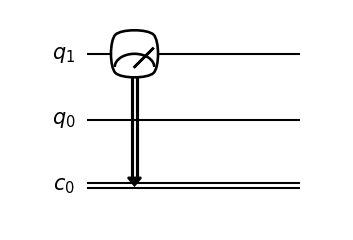

AttributeError: 'NoneType' object has no attribute 'savefig'

In [11]:
import json
import qutip
import numpy as np
from qutip import Qobj
from qutip_qip.operations import rx
from qutip_qip.circuit import QubitCircuit

# Load input from file
import os

if not os.path.exists("circuit_input.json"):
    print("Error: circuit_input.json not found. Make sure app.py creates it before running this notebook.")
    data = {"gates": []}  # Use an empty default circuit
else:
    with open("circuit_input.json", "r") as f:
        data = json.load(f)


# Extract gate sequence
gate_sequence = data.get("gates", [])

# Initialize circuit
qc = QubitCircuit(2, num_cbits=1)

# Add gates dynamically based on input
for gate in gate_sequence:
    if gate["type"] == "H":
        qc.add_gate("SNOT", targets=gate["qubits"][0])
    elif gate["type"] == "X":
        qc.add_gate("X", targets=gate["qubits"][0])
    elif gate["type"] == "CNOT":
        qc.add_gate("CNOT", controls=gate["controls"], targets=gate["targets"])

# Add measurement
qc.add_measurement("M0", targets=1, classical_store=0)

# Save and visualize circuit
fig = qc.draw()
fig.savefig("static/generated_circuit.png")
